In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib_inline

UsageError: Line magic function `%matplotlib_inline` not found.


# Results of the reconstruction using VarNet

In [11]:
image = 'file_brain_AXFLAIR_201_6002868.h5'#'file_brain_AXFLAIR_201_6002867.h5'
path_reco = '/home/hpc/iwbi/iwbi009h/CIP_-MoDL_vs_VarNet-/fastMRI/fastmri_examples/varnet/varnet/varnet_demo/reconstructions/'
path_test = '/home/hpc/iwbi/iwbi009h/CIP_-MoDL_vs_VarNet-/multicoil_test/'
reconstructed = h5py.File(path_reco+image)
original = h5py.File(path_test+image)
print('Keys:', list(original.keys()))
print('Attrs:', dict(original.attrs))
print('Keys:', list(reconstructed.keys()))
print('Attrs:', dict(reconstructed.attrs))

Keys: ['ismrmrd_header', 'kspace', 'reconstruction_rss']
Attrs: {'acquisition': 'AXFLAIR', 'max': 0.0003705272415343317, 'norm': 0.07076613984413803, 'patient_id': '7ade28c925cdd612b1101ed5e28ba2d9c0f827c7c6e61857c7ef2adaf8956188'}
Keys: ['reconstruction']
Attrs: {}


In [12]:
reconstruction = reconstructed['reconstruction'][()]
reconstruction.shape

(16, 320, 320)

In [13]:
#import numpy as np
#atb_orig, _ = extract_data(original)
original_rec = original['reconstruction_rss'][()]
original_rec.dtype


dtype('float32')

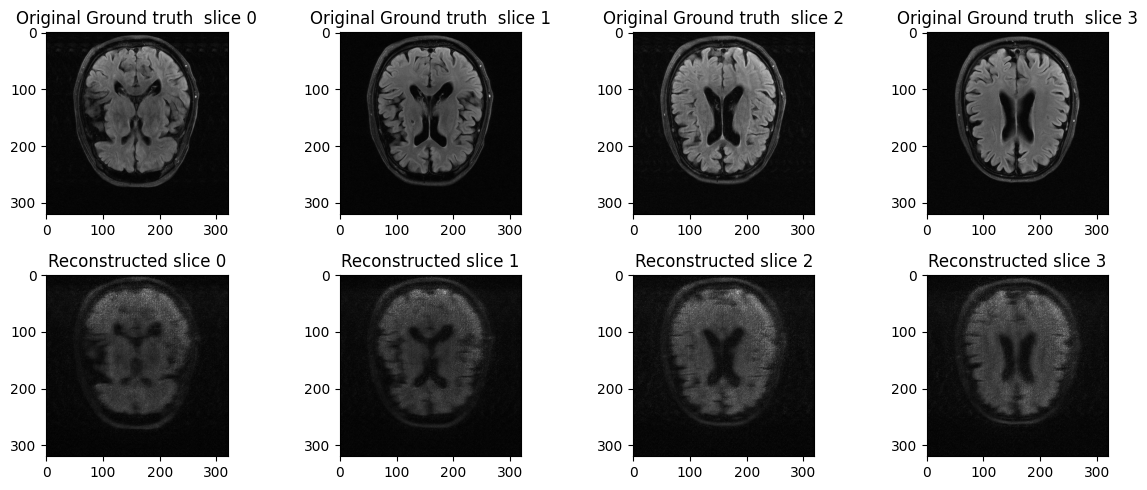

In [14]:
plt.figure(figsize=(12,5))
slice = 0
# plt.subplot(2,4,1); plt.imshow(np.abs(atb_orig)[slice], cmap="gray"); plt.title(f'atb slice {slice}')
# plt.subplot(2,4,2); plt.imshow(np.abs(atb_orig)[slice+1], cmap="gray"); plt.title(f'atb slice {slice+1}')
# plt.subplot(2,4,3); plt.imshow(np.abs(atb_orig)[slice+2], cmap="gray"); plt.title(f'atb slice {slice+2}')
# plt.subplot(2,4,4); plt.imshow(np.abs(atb_orig)[slice+3], cmap="gray"); plt.title(f'atb slice {slice+3}')
plt.subplot(2,4,1); plt.imshow(original_rec[slice], cmap="gray"); plt.title(f'Original Ground truth  slice {slice}')
plt.subplot(2,4,2); plt.imshow(original_rec[slice+1], cmap="gray"); plt.title(f'Original Ground truth  slice {slice+1}')
plt.subplot(2,4,3); plt.imshow(original_rec[slice+2], cmap="gray"); plt.title(f'Original Ground truth  slice {slice+2}')
plt.subplot(2,4,4); plt.imshow(original_rec[slice+3], cmap="gray"); plt.title(f'Original Ground truth  slice {slice+3}')
plt.subplot(2,4,5); plt.imshow(reconstruction[slice], cmap="gray"); plt.title(f'Reconstructed slice {slice}')
plt.subplot(2,4,6); plt.imshow(reconstruction[slice+1], cmap="gray"); plt.title(f'Reconstructed slice {slice+1}')
plt.subplot(2,4,7); plt.imshow(reconstruction[slice+2], cmap="gray"); plt.title(f'Reconstructed slice {slice+2}')
plt.subplot(2,4,8); plt.imshow(reconstruction[slice+3], cmap="gray"); plt.title(f'Reconstructed slice {slice+3}')
plt.tight_layout() 

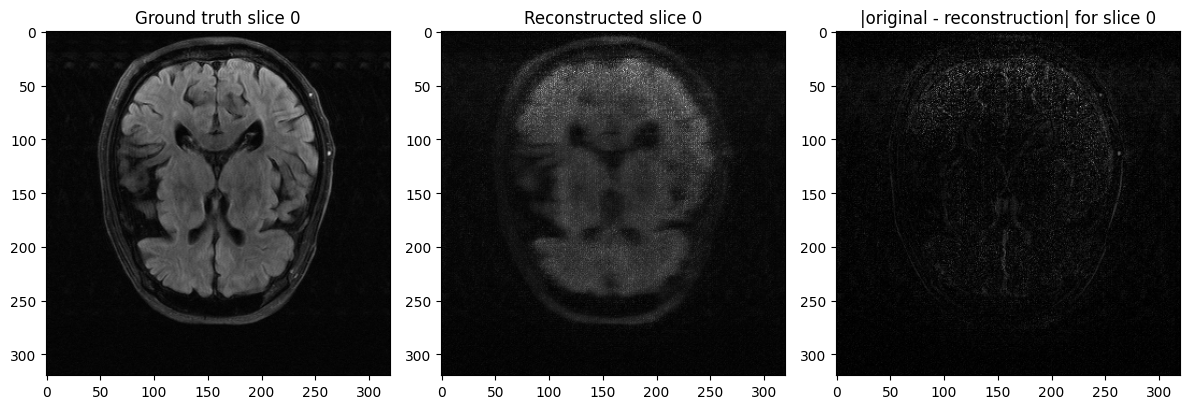

In [15]:
plt.figure(figsize=(12,5))
slice = 0
plt.subplot(1,3,1); plt.imshow(original_rec[slice], cmap="gray"); plt.title(f'Ground truth slice {slice}')
plt.subplot(1,3,2); plt.imshow(reconstruction[slice], cmap="gray"); plt.title(f'Reconstructed slice {slice}')
plt.subplot(1,3,3); plt.imshow(np.abs(original_rec[slice]- reconstruction[slice]), cmap="gray"); plt.title(f'|original - reconstruction| for slice {slice}')

plt.tight_layout() 

In [16]:
from ipywidgets import interact, fixed
def showslices(original, reconstruction):
  @interact
  def _showslices(x=(0,len(original)-1)):
    #fixed(data.shape[1:])
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1); plt.imshow(original[x], cmap = 'gray'); plt.title(f'Ground truth slice {x}')
    plt.subplot(1,3,2); plt.imshow(reconstruction[x], cmap="gray"); plt.title(f'Reconstructed slice {x}')
    plt.subplot(1,3,3); plt.imshow(np.abs(original[x]- reconstruction[x]), cmap="gray"); plt.title(f'|original - reconstruction| for slice {x}')

In [17]:
showslices(original_rec, reconstruction)

interactive(children=(IntSlider(value=7, description='x', max=15), Output()), _dom_classes=('widget-interact',…

In [18]:
# Noise level sigma
# From VARNET paper: Seite 3056 (2/17) zwischen Gleichungen [2] und [3]
# l2_norm(f - f_noisy)
l2_norm = np.sqrt(np.sum((original_rec[slice]- reconstruction[slice])**2))
l2_norm

0.008635448

# MODL
## Training set

In [1]:
from ipywidgets import interact, fixed
def showModlData(data):
  @interact
  def showModlData(y=(0,len(data['trnCsm'])-1), x =(0,data['trnCsm'].shape[1]-1)):
    #fixed(data.shape[1:])
    plt.figure(figsize=(12,5))
    #showSlices(data['trnCsm'][y])
    plt.subplot(1,3,1); plt.imshow(np.abs(data['trnCsm'][y][x]), cmap = 'gray'); plt.title(f'CSM slice  #{y}, coil # {x}')
    plt.subplot(1,3,2); plt.imshow(data['trnMask'][y], cmap = 'gray'); plt.title(f'Mask slice  #{y}')
    plt.subplot(1,3,3); plt.imshow(np.abs(data['trnOrg'][y]), cmap = 'gray'); plt.title(f'Org slice  #{y}')

In [4]:
DataModl = h5py.File('/home/hpc/iwbi/iwbi009h/CIP_-MoDL_vs_VarNet-/modl/dataset.hdf5','r')
print(DataModl.keys())
print(DataModl['trnCsm'])
print(DataModl['trnMask'])
print(DataModl['trnOrg'])

showModlData(DataModl)

<KeysViewHDF5 ['trnCsm', 'trnMask', 'trnOrg', 'tstCsm', 'tstMask', 'tstOrg']>
<HDF5 dataset "trnCsm": shape (360, 12, 256, 232), type "<c8">
<HDF5 dataset "trnMask": shape (360, 256, 232), type "|i1">
<HDF5 dataset "trnOrg": shape (360, 256, 232), type "<c8">


interactive(children=(IntSlider(value=179, description='y', max=359), IntSlider(value=5, description='x', max=…